In [9]:
import pandas as pd

# Load the dataset
file_path = 'Korea_Income_and_Welfare.csv'
data = pd.read_csv(file_path)

# Map region codes to region names
region_map = {
    1: "Seoul",
    2: "Kyeong-gi",
    3: "Kyoung-nam",
    4: "Kyoung-buk",
    5: "Chung-nam",
    6: "Gang-won & Chung-buk",
    7: "Jeolla & Jeju"
}

# Reverse the region_map for numeric labeling
region_reverse_map = {v: k for k, v in region_map.items()}

# Map gender codes to gender names
gender_map = {
    1: "Male",
    2: "Female"
}

# Reverse the gender_map for numeric labeling
gender_reverse_map = {v: k for k, v in gender_map.items()}

# Map education level codes to education level names
education_level_map = {
    1: "No education (under 7 yrs-old)",
    2: "No education (7 & over 7 yrs-old)",
    3: "Elementary",
    4: "Middle school",
    5: "High school",
    6: "College",
    7: "University degree",
    8: "MA",
    9: "Doctoral degree"
}

# Reverse the education_level_map for numeric labeling
education_level_reverse_map = {v: k for k, v in education_level_map.items()}

# Map religion codes to religion names
religion_map = {
    1: "Have religion",
    2: "Do not have"
}

# Reverse the religion_map for numeric labeling
religion_reverse_map = {v: k for k, v in religion_map.items()}

# Map reason_none_worker codes to reason names
reason_none_worker_map = {
    1: "No capable",
    2: "In military service",
    3: "Studying in school",
    4: "Prepare for school",
    5: "Prepare to apply job",
    6: "House worker",
    7: "Caring kids at home",
    8: "Nursing",
    9: "Giving-up economic activities",
    10: "No intention to work",
    11: "Others"
}

# Reverse the reason_none_worker_map for numeric labeling
reason_none_worker_reverse_map = {v: k for k, v in reason_none_worker_map.items()}

# Apply the reverse mappings
data['region'] = data['region'].map(region_reverse_map)
data['gender'] = data['gender'].map(gender_reverse_map)
data['education_level'] = data['education_level'].map(education_level_reverse_map)
data['religion'] = data['religion'].map(religion_reverse_map)
data['reason_none_worker'] = data['reason_none_worker'].map(reason_none_worker_reverse_map)

# Save the modified data to a new CSV file
output_file_path = 'Korea_Income_and_Welfare_Labeled.csv'
data.to_csv(output_file_path, index=False)


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Korea_Income_and_Welfare.csv'
data = pd.read_csv(file_path)

# Map region codes to region names
region_map = {
    1: "Seoul",
    2: "Kyeong-gi",
    3: "Kyoung-nam",
    4: "Kyoung-buk",
    5: "Chung-nam",
    6: "Gang-won & Chung-buk",
    7: "Jeolla & Jeju"
}

# Reverse the region_map for numeric labeling
region_reverse_map = {v: k for k, v in region_map.items()}

# Map gender codes to gender names
gender_map = {
    1: "Male",
    2: "Female"
}

# Reverse the gender_map for numeric labeling
gender_reverse_map = {v: k for k, v in gender_map.items()}

# Map education level codes to education level names
education_level_map = {
    1: "No education (under 7 yrs-old)",
    2: "No education (7 & over 7 yrs-old)",
    3: "Elementary",
    4: "Middle school",
    5: "High school",
    6: "College",
    7: "University degree",
    8: "MA",
    9: "Doctoral degree"
}

# Reverse the education_level_map for numeric labeling
education_level_reverse_map = {v: k for k, v in education_level_map.items()}

# Map religion codes to religion names
religion_map = {
    1: "Have religion",
    2: "Do not have"
}

# Reverse the religion_map for numeric labeling
religion_reverse_map = {v: k for k, v in religion_map.items()}

# Map reason_none_worker codes to reason names
reason_none_worker_map = {
    1: "No capable",
    2: "In military service",
    3: "Studying in school",
    4: "Prepare for school",
    5: "Prepare to apply job",
    6: "House worker",
    7: "Caring kids at home",
    8: "Nursing",
    9: "Giving-up economic activities",
    10: "No intention to work",
    11: "Others"
}

# Reverse the reason_none_worker_map for numeric labeling
reason_none_worker_reverse_map = {v: k for k, v in reason_none_worker_map.items()}

# Apply the reverse mappings
data['region'] = data['region'].map(region_reverse_map)
data['gender'] = data['gender'].map(gender_reverse_map)
data['education_level'] = data['education_level'].map(education_level_reverse_map)
data['religion'] = data['religion'].map(religion_reverse_map)
data['reason_none_worker'] = data['reason_none_worker'].map(reason_none_worker_reverse_map)


# 지역 이동 컬럼 생성
data['region_movement'] = None
# 동일한 ID 내에서 지역 이동 여부를 체크하고 이동한 지역 라벨값을 저장
def check_region_movement(df):
    df = df.sort_values('year')
    df['previous_region'] = df['region'].shift(1)
    df['region_movement'] = df.apply(lambda row: row['region'] if row['region'] != row['previous_region'] else None, axis=1)
    df['region_movement'] = df['region_movement'].shift(-1)
    return df.drop(columns=['previous_region'])

# 그룹화하여 적용
data = data.groupby('id').apply(check_region_movement).reset_index(drop=True)

# Save the modified data to a new CSV file
output_file_path = 'Korea_Income_and_Welfare_Filter.csv'
data.to_csv(output_file_path, index=False)


In [23]:
import pandas as pd

# 데이터셋 로드
file_path = 'Korea_Income_and_Welfare_Filter.csv'
data = pd.read_csv(file_path)

# 데이터 확인
print("데이터셋의 첫 5개 행:")
print(data.head())

# 숫자형이 아닌 열을 확인하고 제거
for col in data.columns:
    if data[col].dtype == 'object':
        print(f"열 '{col}'은(는) 숫자형이 아닙니다. 제거합니다.")
        data = data.drop(columns=[col])

# 필요한 변수들만 선택 (숫자로 인코딩된 경우)
variables = ['income', 'education_level', 'religion', 'occupation', 'company_size', 'reason_none_worker']

# 1번 또는 2번 지역에서 다른 지역으로 이동한 경우
from_region_1_2 = data[(data['region'].isin([1, 2])) & (data['region_movement'].notna()) & (~data['region_movement'].isin([1, 2]))]

# 다른 지역에서 1번 또는 2번 지역으로 이동한 경우
to_region_1_2 = data[(~data['region'].isin([1, 2])) & (data['region_movement'].notna()) & (data['region_movement'].isin([1, 2]))]

# 필터링된 데이터 존재 여부 확인
print("\n1번 또는 2번 지역에서 다른 지역으로 이동한 경우 데이터 수:", from_region_1_2.shape[0])
print("다른 지역에서 1번 또는 2번 지역으로 이동한 경우 데이터 수:", to_region_1_2.shape[0])

# 필터링된 데이터를 CSV 파일로 저장
from_region_1_2.to_csv('from_region_1_2.csv', index=False)
to_region_1_2.to_csv('to_region_1_2.csv', index=False)

print("\n필터링된 데이터가 각각 'from_region_1_2.csv'와 'to_region_1_2.csv' 파일에 저장되었습니다.")


데이터셋의 첫 5개 행:
      id  year  wave  region  income  family_member  gender  year_born  \
0  10101  2005     1       1   614.0              1       2       1936   
1  10101  2011     7       1   896.0              1       2       1936   
2  10101  2012     8       1  1310.0              1       2       1936   
3  10101  2013     9       1  2208.0              1       2       1936   
4  10101  2014    10       1   864.0              1       2       1936   

   education_level  marriage  religion occupation company_size  \
0                2         2       2.0                           
1                2         2       2.0                           
2                2         2       2.0                           
3                2         2       2.0                           
4                2         2       2.0                           

   reason_none_worker  region_movement  
0                 NaN              NaN  
1                 NaN              NaN  
2                 NaN

from_region_1_2 데이터셋의 첫 5개 행:
       id  year  wave  region  income  family_member  gender  year_born  \
0   70101  2011     7       1   638.0              1       2       1930   
1  280101  2013     9       1   814.0              2       1       1968   
2  330101  2015    11       1  1027.0              1       2       1939   
3  630101  2007     3       1  4228.0              4       1       1950   
4  740101  2010     6       1  3407.0              2       2       1982   

   education_level  marriage  religion  reason_none_worker  region_movement  
0                2         2       2.0                 NaN              7.0  
1                5         5       2.0                 NaN              7.0  
2                3         2       1.0                 NaN              4.0  
3                5         1       1.0                 NaN              5.0  
4                5         5       2.0                 NaN              5.0  

to_region_1_2 데이터셋의 첫 5개 행:
        id  year  wave

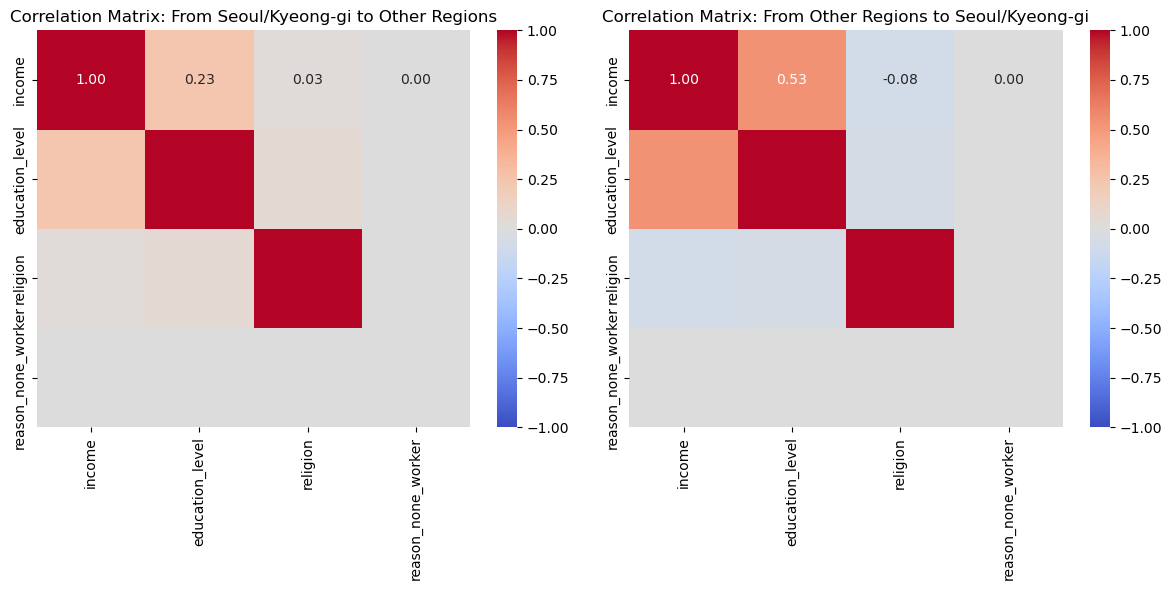

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 로드
from_region_1_2_file = 'from_region_1_2.csv'
to_region_1_2_file = 'to_region_1_2.csv'

from_region_1_2 = pd.read_csv(from_region_1_2_file)
to_region_1_2 = pd.read_csv(to_region_1_2_file)

# 데이터 확인
print("from_region_1_2 데이터셋의 첫 5개 행:")
print(from_region_1_2.head())
print("\nto_region_1_2 데이터셋의 첫 5개 행:")
print(to_region_1_2.head())

# 상관 관계를 계산할 변수들
variables = ['income', 'education_level', 'religion', 'occupation', 'company_size', 'reason_none_worker']

# 실제로 존재하는 변수들만 선택
available_variables_from = [var for var in variables if var in from_region_1_2.columns]
available_variables_to = [var for var in variables if var in to_region_1_2.columns]

# 1번 또는 2번 지역에서 다른 지역으로 이동한 경우 상관 관계 매트릭스
corr_from_region_1_2 = from_region_1_2[available_variables_from].corr().fillna(0)

# 다른 지역에서 1번 또는 2번 지역으로 이동한 경우 상관 관계 매트릭스
corr_to_region_1_2 = to_region_1_2[available_variables_to].corr().fillna(0)

# 상관 관계 매트릭스 그래프 그리기
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(corr_from_region_1_2, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix: From Seoul/Kyeong-gi to Other Regions')

plt.subplot(1, 2, 2)
sns.heatmap(corr_to_region_1_2, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix: From Other Regions to Seoul/Kyeong-gi')

plt.tight_layout()
plt.show()


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# 데이터셋 로드
file_path = 'Korea_Income_and_Welfare_Filter.csv'
data = pd.read_csv(file_path)

# 데이터 확인
print("데이터셋의 첫 5개 행:")
print(data.head())

# 데이터셋의 열 확인
print("\n데이터셋의 열 목록:")
print(data.columns)

# 필요 변수 정의
label_columns = ['region', 'gender', 'religion', 'occupation']  # 'married' 제외
linear_columns = ['income', 'family_member', 'education_level', 'company_size']
target = 'region_movement'

# 공백 문자열을 NaN으로 변환
data.replace(' ', pd.NA, inplace=True)

# 라벨 데이터와 선형 데이터를 수치형으로 변환 (라벨 인코딩)
label_data = data[label_columns].apply(lambda x: pd.factorize(x)[0])
linear_data = data[linear_columns]

# 모든 데이터를 하나의 데이터프레임으로 병합
processed_data = pd.concat([label_data, linear_data], axis=1)
processed_data[target] = pd.factorize(data[target])[0]

# NaN 값 제거
processed_data = processed_data.dropna()

# 'region_movement' 열이 NaN이 아닌 데이터만 사용
processed_data = processed_data[processed_data[target].notna()]

# 특징 및 레이블 정의
X = processed_data.drop(columns=[target])
y = processed_data[target]

# 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 예측
y_pred = clf.predict(X_test)

# 모델 평가
print("모델 평가 결과:")
print(f"정확도: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# 모델 저장
model_filename = 'decision_tree_model.joblib'
joblib.dump(clf, model_filename)
print(f"\n모델이 '{model_filename}' 파일에 저장되었습니다.")


데이터셋의 첫 5개 행:
      id  year  wave  region  income  family_member  gender  year_born  \
0  10101  2005     1       1   614.0              1       2       1936   
1  10101  2011     7       1   896.0              1       2       1936   
2  10101  2012     8       1  1310.0              1       2       1936   
3  10101  2013     9       1  2208.0              1       2       1936   
4  10101  2014    10       1   864.0              1       2       1936   

   education_level  marriage  religion occupation company_size  \
0                2         2       2.0                           
1                2         2       2.0                           
2                2         2       2.0                           
3                2         2       2.0                           
4                2         2       2.0                           

   reason_none_worker  region_movement  
0                 NaN              NaN  
1                 NaN              NaN  
2                 NaN